In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import re
from nltk.corpus import stopwords
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
plt.style.use('ggplot')

In [2]:
df = pd.read_csv('UpdatedResumeDataSet.csv')
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [3]:
df.sample(5)

,Category,Resume
157,Web Designing,"Technical Skills Web Technologies: Angular JS,..."
747,Hadoop,"Technical Skills Programming Languages: C, C++..."
924,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne..."
715,Database,"Technical Skills Databases: Oracle RDBMS- 10g,..."
434,SAP Developer,Education Details \r\nMay 2013 Master Computer...


In [4]:
df.shape

(962, 2)

In [5]:
df['Category'].unique()

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

In [6]:
df['Category'].value_counts()

Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: count, dtype: int64

Data visualization

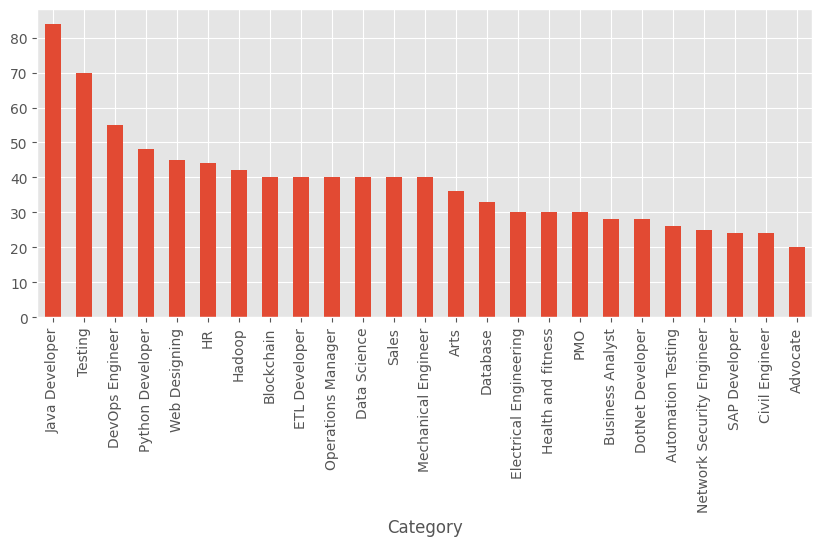

In [7]:
plt.figure(figsize=(10,4))
df['Category'].value_counts().plot(kind='bar')
plt.show()

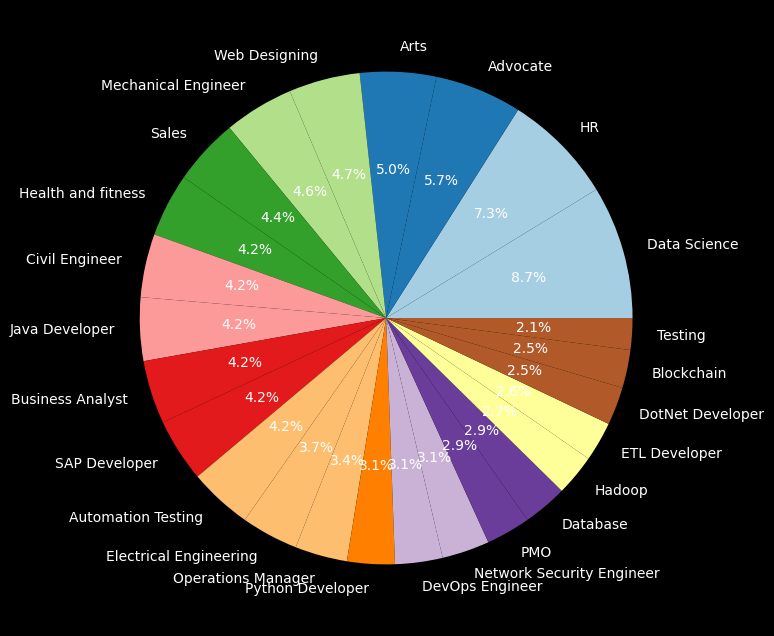

In [8]:

count = df['Category'].value_counts()
labels = df['Category'].unique()

# Define colors for the pie chart that contrast well with a black background
colors = plt.cm.Paired(np.linspace(0, 1, len(labels)))

plt.figure(figsize=(20,8), facecolor='black')
plt.pie(count, labels=labels, autopct='%1.1f%%', colors=colors, textprops={'color': 'white'})
plt.gca().set_facecolor('black')  # Set the background color of the plot area
plt.show()

Text Cleaning using NLP

Remove url,
Remove email, 
Remove special character,
Remove stopwords,

In [9]:
df['Resume'][0]

'Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\r\nSkill Details \r\nJAVASCRIPT- Exprience - 24 months\r\njQuery- Exprience - 24 months\r\nPython- Exprience - 24 monthsCompany Details \r\ncompany - Ernst & Young LLP\r\ndescription - Fraud Investigatio

In [10]:
def clean(text):
    Url_pattern = re.compile(r'http:?://\S+|www\.\S+')
    email_pattern = re.compile(r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Za-z]{2,}\b')
    
    # Remove URLs
    clean_text = Url_pattern.sub('', text)
    # Remove email addresses
    clean_text = email_pattern.sub('', clean_text)
    # Remove punctuation
    clean_text = re.sub('[^\w\s]', '', clean_text)
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    clean_text = ' '.join(word for word in clean_text.split() if word.lower() not in stop_words)
    # Strip any leading or trailing whitespace
    clean_text = clean_text.strip()

    return clean_text

In [11]:
s = 'Hello%.$$fajpojca https://wwww.dgowiah.com ! you can fniwna aownhfc l aoajf2(&(^@&))'

In [12]:
clean(s)

'Hellofajpojca httpsw fniwna aownhfc l aoajf2'

In [13]:
df['Resume'] = df['Resume'].apply(lambda x:clean(x))

In [14]:
df['Resume'][0]

'Skills Programming Languages Python pandas numpy scipy scikitlearn matplotlib Sql Java JavaScriptJQuery Machine learning Regression SVM NaÃve Bayes KNN Random Forest Decision Trees Boosting techniques Cluster Analysis Word Embedding Sentiment Analysis Natural Language processing Dimensionality reduction Topic Modelling LDA NMF PCA Neural Nets Database Visualizations Mysql SqlServer Cassandra Hbase ElasticSearch D3js DCjs Plotly kibana matplotlib ggplot Tableau Others Regular Expression HTML CSS Angular 6 Logstash Kafka Python Flask Git Docker computer vision Open CV understanding Deep learningEducation Details Data Science Assurance Associate Data Science Assurance Associate Ernst Young LLP Skill Details JAVASCRIPT Exprience 24 months jQuery Exprience 24 months Python Exprience 24 monthsCompany Details company Ernst Young LLP description Fraud Investigations Dispute Services Assurance TECHNOLOGY ASSISTED REVIEW TAR Technology Assisted Review assists accelerating review process run ana

Encoding

In [15]:
le = LabelEncoder()
le.fit(df[['Category']])
df['Category'] = le.transform(df['Category'])


c:\Users\RAVI PATHAK\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [16]:
df['Category'].unique()

array([ 6, 12,  0,  1, 24, 16, 22, 14,  5, 15,  4, 21,  2, 11, 18, 20,  8,
       17, 19,  7, 13, 10,  9,  3, 23])

In [17]:
Tfidf = TfidfVectorizer()
Tfidf.fit(df['Resume'])
resume = Tfidf.transform(df['Resume'])


In [18]:
x_train, x_test, y_train, y_test = train_test_split(resume, df['Category'], test_size=0.2, random_state=42)

In [19]:
x_train.shape

(769, 8017)

In [20]:
y_train.shape

(769,)

In [21]:
y_test.shape

(193,)

In [22]:
x_test.shape

(193, 8017)

In [23]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier()
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)*100
print(f'Accuracy score of the KNN Classifier on test data ->: {accuracy}')

Accuracy score of the KNN Classifier on test data ->: 98.44559585492227


In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsOneClassifier

In [25]:
models = {
    'KNeighborsClassifier': KNeighborsClassifier(),
    'LogisticRegression': LogisticRegression(),
    'RandomForestClassifier': RandomForestClassifier(),
    'SVC': SVC(),
    'MultinomialNB': MultinomialNB(),
    'OneVsOneClassifier': OneVsOneClassifier(KNeighborsClassifier())

}

In [26]:
from sklearn.metrics import accuracy_score

accuracy_scores = {}
for model_name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)*100  # Ensure accuracy_score is from sklearn.metrics
    accuracy_scores[model_name] = accuracy
    print(f'Accuracy of {model_name} on test data: {accuracy}')


Accuracy of KNeighborsClassifier on test data: 98.44559585492227
Accuracy of LogisticRegression on test data: 99.48186528497409
Accuracy of RandomForestClassifier on test data: 98.44559585492227
Accuracy of SVC on test data: 99.48186528497409
Accuracy of MultinomialNB on test data: 97.92746113989638
Accuracy of OneVsOneClassifier on test data: 98.44559585492227


Using the LogisticRegression as it has the highest Accuracy

In [27]:
model = LogisticRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

In [28]:
my_resume = '''I.T. Skills Ã¢Â€Â¢ Windows XP, Ms Office (Word, Excel: Look-ups; Pivot table; other basic functions ; Power Point) Ã¢Â€Â¢ Saral Payment Package- payroll software Ã¢Â€Â¢ Internet ApplicationsEducation Details 
January 2006 Bachelor in Hospitality Management International Hospitality Management  Queen Margaret University Edinburg
January 2006 diploma Hotel Management  International Institute of Hotel Management
HR 


Skill Details 
Hr Management- Exprience - Less than 1 year monthsCompany Details 
company - Atri Developers
description - Ã¢Â€Â¢ HR Payroll Statutory Compliance Performance Management
company - 
description - Employee Relations and Administration: Creating industry specific Policies, Procedure, Forms, Formats, Letters, Checklists etc

Payroll Management: Salary restructuring to process payroll of 600 employees.
Ã¢Â€Â¢ Validation of all input (Attendance, Leaves, and Salaries) before starting salary process.
Ã¢Â€Â¢ Processing accurate & error free salary of employees.
Ã¢Â€Â¢ Responsible for compensation and benefits administration.
Ã¢Â€Â¢ Coordinate with Accounts team for salary processing.
Ã¢Â€Â¢ Attendance & Leave record management
Ã¢Â€Â¢ Assuring prompt and satisfactory resolution of payroll related queries of all employees.

Statutory Compliance Management:
Ã¢Â€Â¢  Manage various statutory compliance requirements (PF, ESIC, PT, Gratuity, TDS etc calculations, deduction, payment and return filing.
Ã¢Â€Â¢ Generate statutory reports like Form 16, Form 24Q. Conducting session with employees on Statutory Policies and procedure, compliance related topics.
Ã¢Â€Â¢ Shops and Commercial Establishments Act (S&E)
Ã¢Â€Â¢ The Payment of Gratuity Act 1972
Recruitment and Selection: Handling recruitment like job posting in naukri portal and coordination. Create annual manpower plan and budget. Screen and schedule preliminary interview. Arrange for employee orientation. Handling joining formalities and salary account opening formalities.

Performance Management: End to end facilitation of PMS starting from creating Job Description & Appraisal Forms to Disbursement of Letters. KRA setting, Mid-year reviews, Annual reviews, handling all appraisal activities (360 Degree)

Training and Development: Conduct training need analysis and arrange various training session.

Employee engagement and  Employee Welfare: Creation and deployment  of Sales  Rewards and Recognition Schemes, Periodic Interactive sessions like Monthly Birthday Celebration, Annual Day, Diwali Dhamaka, Offsite etc.
Working on Saral Payment Package- payroll software as well as on excel
Assisting MD in HR works, offering suggestions and answering employee queries on payroll compliance related issues, other benefits (insurance, medical, reimbursement, ), full & final settlement of resigned employees.
'''

In [29]:
cleaned_resume = clean(my_resume)
input_features = Tfidf.transform([cleaned_resume])
prediction_id = model.predict(input_features)[0]
Category_map = {
    15: 'Java Developer',
    23: 'Testing',
    8: 'DevOps Engineer',
    20: 'Python Developer',
    24: 'Web Designing',
    12: 'HR',
    13: 'Hadoop',
    3: 'Blockchain',
    10: 'ETL Developer',
    18: 'Operations Manager',
    6: 'Data Science',
    22: 'Sales',
    16: 'Mechanical Engineer',
    1: 'Arts',
    7: 'Database',
    11: 'Electrical Engineering',
    14: 'Health and fitness',
    19: 'PMO',
    4: 'Business Analyst',
    9: 'DotNet Developer',
    2: 'Automation Testing',
    17: 'Network Security Engineer',
    21: 'SAP Developer',
    5: 'Civil Engineer',
    0: 'Advocate',


}
category_name =Category_map.get(prediction_id,'Unknown')
print('Predicted Category is ->', category_name)

Predicted Category is -> HR


In [30]:
df.head()

,Category,Resume
0,6,Skills Programming Languages Python pandas num...
1,6,Education Details May 2013 May 2017 UITRGPV Da...
2,6,Areas Interest Deep Learning Control System De...
3,6,Skills â R â Python â SAP HANA â Tableau â SAP...
4,6,Education Details MCA YMCAUST Faridabad Haryan...


In [31]:
import pickle
pickle.dump(Tfidf, open('Tfidf.pkl','wb'))
pickle.dump(model, open('model.pkl','wb'))